In [1]:
import pandas as pd
import numpy as np
!pip install pyodbc
import warnings
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from adjustText import adjust_text
from IPython.display import display,clear_output

Defaulting to user installation because normal site-packages is not writeable


In [24]:
well_dynamic=pd.read_excel("BRN_Production and Injection HI 1.xlsx",sheet_name=6)
well_dynamic.head()

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls)
0,BRN010,511953.13,2412237.89,2000-06-01,30,432.522333,0,4.303333
1,BRN010,511953.13,2412237.89,2000-07-01,31,804.054194,0,19.663548
2,BRN010,511953.13,2412237.89,2000-08-01,31,787.280645,0,0.587419
3,BRN010,511953.13,2412237.89,2000-09-01,30,853.469000,0,12.869333
4,BRN010,511953.13,2412237.89,2000-10-01,31,894.834839,0,4.644839


In [25]:
well_dynamic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5939 entries, 0 to 5938
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   WELL               5939 non-null   object        
 1   X                  5939 non-null   float64       
 2   Y                  5939 non-null   float64       
 3   MONTH              5939 non-null   datetime64[ns]
 4   DAYS               5939 non-null   int64         
 5   OIL_VOLUME(Kls)    5939 non-null   float64       
 6   GAS_VOLUME(MSCUM)  5939 non-null   int64         
 7   WATER_VOLUME(Kls)  5939 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 371.3+ KB


In [26]:
well_dynamic

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls)
0,BRN010,511953.13,2412237.89,2000-06-01,30,432.522333,0,4.303333
1,BRN010,511953.13,2412237.89,2000-07-01,31,804.054194,0,19.663548
2,BRN010,511953.13,2412237.89,2000-08-01,31,787.280645,0,0.587419
3,BRN010,511953.13,2412237.89,2000-09-01,30,853.469000,0,12.869333
4,BRN010,511953.13,2412237.89,2000-10-01,31,894.834839,0,4.644839
...,...,...,...,...,...,...,...,...
5934,BRN008,510753.68,2412497.86,2023-11-01,30,0.000000,0,0.000000
5935,BRN008,510753.68,2412497.86,2023-12-01,31,0.000000,0,0.000000
5936,BRN008,510753.68,2412497.86,2024-01-01,31,0.000000,0,0.000000
5937,BRN008,510753.68,2412497.86,2024-02-01,29,0.000000,0,0.000000


In [27]:
df1= well_dynamic.copy()
#calculating oil, gas, water, liquid(water+oil) rates
df1['OIL Rate (KLpd)']= df1['OIL_VOLUME(Kls)']/df1['DAYS']
df1['WATER RATE (KLPD)']=df1['WATER_VOLUME(Kls)']/df1['DAYS']
df1['LIQUID RATE (KLPD)'] = df1['OIL Rate (KLpd)'] + df1['WATER RATE (KLPD)']

In [28]:
df1

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),OIL Rate (KLpd),WATER RATE (KLPD),LIQUID RATE (KLPD)
0,BRN010,511953.13,2412237.89,2000-06-01,30,432.522333,0,4.303333,14.417411,0.143444,14.560856
1,BRN010,511953.13,2412237.89,2000-07-01,31,804.054194,0,19.663548,25.937232,0.634308,26.571540
2,BRN010,511953.13,2412237.89,2000-08-01,31,787.280645,0,0.587419,25.396150,0.018949,25.415099
3,BRN010,511953.13,2412237.89,2000-09-01,30,853.469000,0,12.869333,28.448967,0.428978,28.877944
4,BRN010,511953.13,2412237.89,2000-10-01,31,894.834839,0,4.644839,28.865640,0.149834,29.015473
...,...,...,...,...,...,...,...,...,...,...,...
5934,BRN008,510753.68,2412497.86,2023-11-01,30,0.000000,0,0.000000,0.000000,0.000000,0.000000
5935,BRN008,510753.68,2412497.86,2023-12-01,31,0.000000,0,0.000000,0.000000,0.000000,0.000000
5936,BRN008,510753.68,2412497.86,2024-01-01,31,0.000000,0,0.000000,0.000000,0.000000,0.000000
5937,BRN008,510753.68,2412497.86,2024-02-01,29,0.000000,0,0.000000,0.000000,0.000000,0.000000


In [29]:
df=df1.drop(['WELL'], axis=1)
df

,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),OIL Rate (KLpd),WATER RATE (KLPD),LIQUID RATE (KLPD)
0,511953.13,2412237.89,2000-06-01,30,432.522333,0,4.303333,14.417411,0.143444,14.560856
1,511953.13,2412237.89,2000-07-01,31,804.054194,0,19.663548,25.937232,0.634308,26.571540
2,511953.13,2412237.89,2000-08-01,31,787.280645,0,0.587419,25.396150,0.018949,25.415099
3,511953.13,2412237.89,2000-09-01,30,853.469000,0,12.869333,28.448967,0.428978,28.877944
4,511953.13,2412237.89,2000-10-01,31,894.834839,0,4.644839,28.865640,0.149834,29.015473
...,...,...,...,...,...,...,...,...,...,...
5934,510753.68,2412497.86,2023-11-01,30,0.000000,0,0.000000,0.000000,0.000000,0.000000
5935,510753.68,2412497.86,2023-12-01,31,0.000000,0,0.000000,0.000000,0.000000,0.000000
5936,510753.68,2412497.86,2024-01-01,31,0.000000,0,0.000000,0.000000,0.000000,0.000000
5937,510753.68,2412497.86,2024-02-01,29,0.000000,0,0.000000,0.000000,0.000000,0.000000


In [30]:
#taking average rate for each month
ave_grouped_rate11 = df.groupby(['MONTH']).mean()
ave_grouped_rate11

,X,Y,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),OIL Rate (KLpd),WATER RATE (KLPD),LIQUID RATE (KLPD)
MONTH,,,,,,,,,
1989-04-01,510492.630000,2.412441e+06,30.000000,8.270000,0.0,0.000000,0.275667,0.000000,0.275667
1989-05-01,510492.630000,2.412441e+06,31.000000,34.103226,0.0,0.000000,1.100104,0.000000,1.100104
1989-06-01,510492.630000,2.412441e+06,30.000000,28.780000,0.0,0.000000,0.959333,0.000000,0.959333
1989-07-01,510492.630000,2.412441e+06,31.000000,29.735484,0.0,0.000000,0.959209,0.000000,0.959209
1989-08-01,510492.630000,2.412441e+06,31.000000,23.735484,0.0,0.009677,0.765661,0.000312,0.765973
...,...,...,...,...,...,...,...,...,...
2023-11-01,510532.574000,2.412985e+06,30.000000,8.150057,0.0,160.712067,0.271669,5.357069,5.628737
2023-12-01,510532.574000,2.412985e+06,31.000000,7.833207,0.0,153.004470,0.252684,4.935628,5.188312
2024-01-01,510532.574000,2.412985e+06,31.000000,7.393124,0.0,138.850092,0.238488,4.479035,4.717523


In [31]:
hi_types = {
    'hi_oil':'OIL Rate (KLpd)',
    'hi_water':'WATER RATE (KLPD)',
    'hi_liquid':'LIQUID RATE (KLPD)'}

hi_types.keys()

dict_keys(['hi_oil', 'hi_water', 'hi_liquid'])

In [52]:
#function to calcluate HI
def calc_HI(row):
    if row[hi_types[key]] > 0:
        return (row[hi_types[key]]- ave_grouped_rate11.loc[(row['MONTH']),hi_types[key]])/\
             (ave_grouped_rate11.loc[(row['MONTH']),hi_types[key]])
    else:
        return 0
    
for key in hi_types.keys():
    
    df1[key] = df1.apply(lambda row: calc_HI(row),axis=1)
    df1['cum11_' + key] = df1.groupby('WELL')[key].cumsum()

df1.head()

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),OIL Rate (KLpd),WATER RATE (KLPD),...,hi_oil,cum11_hi_oil,hi_water,cum11_hi_water,hi_liquid,cum11_hi_liquid,class11,class12,labels1,labels2
0,BRN010,511953.13,2412237.89,2000-06-01,30,432.522333,0,4.303333,14.417411,0.143444,...,0.087718,0.087718,2.000000,2.000000,0.094591,0.094591,High Oil and High Water,High Oil and High Liquid,0,0
1,BRN010,511953.13,2412237.89,2000-07-01,31,804.054194,0,19.663548,25.937232,0.634308,...,0.450138,0.537856,2.000000,4.000000,0.468245,0.562836,High Oil and High Water,High Oil and High Liquid,0,0
2,BRN010,511953.13,2412237.89,2000-08-01,31,787.280645,0,0.587419,25.396150,0.018949,...,0.372383,0.910239,2.000000,6.000000,0.372939,0.935775,High Oil and High Water,High Oil and High Liquid,0,0
3,BRN010,511953.13,2412237.89,2000-09-01,30,853.469000,0,12.869333,28.448967,0.428978,...,0.669627,1.579865,0.251326,6.251326,0.661377,1.597152,High Oil and High Water,High Oil and High Liquid,0,0
4,BRN010,511953.13,2412237.89,2000-10-01,31,894.834839,0,4.644839,28.865640,0.149834,...,1.350309,2.930174,-0.483874,5.767452,1.307955,2.905107,High Oil and High Water,High Oil and High Liquid,0,0


In [53]:
df1

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),OIL Rate (KLpd),WATER RATE (KLPD),...,hi_oil,cum11_hi_oil,hi_water,cum11_hi_water,hi_liquid,cum11_hi_liquid,class11,class12,labels1,labels2
0,BRN010,511953.13,2412237.89,2000-06-01,30,432.522333,0,4.303333,14.417411,0.143444,...,0.087718,0.087718,2.000000,2.000000,0.094591,0.094591,High Oil and High Water,High Oil and High Liquid,0,0
1,BRN010,511953.13,2412237.89,2000-07-01,31,804.054194,0,19.663548,25.937232,0.634308,...,0.450138,0.537856,2.000000,4.000000,0.468245,0.562836,High Oil and High Water,High Oil and High Liquid,0,0
2,BRN010,511953.13,2412237.89,2000-08-01,31,787.280645,0,0.587419,25.396150,0.018949,...,0.372383,0.910239,2.000000,6.000000,0.372939,0.935775,High Oil and High Water,High Oil and High Liquid,0,0
3,BRN010,511953.13,2412237.89,2000-09-01,30,853.469000,0,12.869333,28.448967,0.428978,...,0.669627,1.579865,0.251326,6.251326,0.661377,1.597152,High Oil and High Water,High Oil and High Liquid,0,0
4,BRN010,511953.13,2412237.89,2000-10-01,31,894.834839,0,4.644839,28.865640,0.149834,...,1.350309,2.930174,-0.483874,5.767452,1.307955,2.905107,High Oil and High Water,High Oil and High Liquid,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934,BRN008,510753.68,2412497.86,2023-11-01,30,0.000000,0,0.000000,0.000000,0.000000,...,0.000000,-47.826909,0.000000,-8.824562,0.000000,-29.097248,Low Oil and Low Water,Low Oil and Low Liquid,3,3
5935,BRN008,510753.68,2412497.86,2023-12-01,31,0.000000,0,0.000000,0.000000,0.000000,...,0.000000,-47.826909,0.000000,-8.824562,0.000000,-29.097248,Low Oil and Low Water,Low Oil and Low Liquid,3,3
5936,BRN008,510753.68,2412497.86,2024-01-01,31,0.000000,0,0.000000,0.000000,0.000000,...,0.000000,-47.826909,0.000000,-8.824562,0.000000,-29.097248,Low Oil and Low Water,Low Oil and Low Liquid,3,3
5937,BRN008,510753.68,2412497.86,2024-02-01,29,0.000000,0,0.000000,0.000000,0.000000,...,0.000000,-47.826909,0.000000,-8.824562,0.000000,-29.097248,Low Oil and Low Water,Low Oil and Low Liquid,3,3


In [54]:
#function to classify into quadrants
def classify11(df):
    w_dict = {}
    w1_dict = {}
    
    for w in df['WELL'].unique():
        last_cum_hi_oil = df1[(df1['WELL']==w) & (df1['MONTH']==df1[df1['WELL']==w]['MONTH'].max())]['cum11_hi_oil'].iloc[0]
        last_cum_hi_water = df1[(df1['WELL']==w) & (df1['MONTH']==df1[df1['WELL']==w]['MONTH'].max())]['cum11_hi_water'].iloc[0]
        last_cum_hi_liquid = df1[(df1['WELL']==w) & (df1['MONTH']==df1[df1['WELL']==w]['MONTH'].max())]['cum11_hi_liquid'].iloc[0]
        
        if last_cum_hi_oil > 0 and last_cum_hi_water > 0:
            w_dict[w] = 'High Oil and High Water'
        elif last_cum_hi_oil <= 0 and last_cum_hi_water > 0:
            w_dict[w] = 'Low Oil and High Water'
        elif last_cum_hi_oil > 0 and last_cum_hi_water <= 0:
            w_dict[w] = 'High Oil and Low Water'
        elif last_cum_hi_oil <= 0 and last_cum_hi_water <= 0:
            w_dict[w] = 'Low Oil and Low Water'

        if last_cum_hi_oil > 0 and last_cum_hi_liquid > 0:
            w1_dict[w] = 'High Oil and High Liquid'
        elif last_cum_hi_oil <= 0 and last_cum_hi_liquid > 0:
            w1_dict[w] = 'Low Oil and High Liquid'
        elif last_cum_hi_oil > 0 and last_cum_hi_liquid <= 0:
            w1_dict[w] = 'High Oil and Low Liquid'
        elif last_cum_hi_oil <= 0 and last_cum_hi_liquid <= 0:
            w1_dict[w] = 'Low Oil and Low Liquid'
            
    
    return df1['WELL'].map(w_dict), df1['WELL'].map(w1_dict)

df1['class11'], df1['class12'] = classify11(df1)

In [55]:
items = [widgets.Button(description=w) for w in df1['WELL'].unique()]
display(widgets.HBox([items[0],items[1]]))

fmt='%Y-%m-%d'
date_range = pd.date_range(start=df1[df1['WELL']=='BRN004']['MONTH'].min(),end=df1[df1['WELL']=='BRN010']['MONTH'].max(),freq='MS')
options = [(item.strftime(fmt),item) for item in date_range]

slider = widgets.SelectionSlider(
    description='MONTH',
    options=options,
    continuous_update=False
) 

hue_dict = {
    'High Oil and Low Water': 'g',
    'Low Oil and High Water': 'brown',
    'High Oil and High Water': 'b',
    'Low Oil and Low Water': 'r'
}

def update(WELL,MONTH):
    plt.figure(figsize=(10,10))
    plt.xlim(-30,70)
    plt.ylim(-30,130)
    plt.axvline(0,color='black')
    plt.axhline(0,color='black')
    sns.scatterplot('cum_hi_oil','cum_hi_water',data=df1[(df1['HJN023']==WELL)&(df1['MONTH']==MONTH)],
                    hue='class', palette=hue_dict,s=50)
    plt.legend(loc=1)


def scatter(b):
    clear_output(wait=True)
    display(widgets.HBox([items[0],items[1]]))
    interactive_plot = interactive(update,Year=slider,sand=fixed(b.description))
    display(interactive_plot)

    
items[0].on_click(scatter)
items[1].on_click(scatter)


In [56]:
df1['class11'].unique()

array(['High Oil and High Water', 'High Oil and Low Water',
       'Low Oil and High Water', 'Low Oil and Low Water'], dtype=object)

In [57]:
df1['class12'].unique()

array(['High Oil and High Liquid', 'Low Oil and Low Liquid',
       'High Oil and Low Liquid', 'Low Oil and High Liquid'], dtype=object)

In [58]:
#labeling to convert categries to labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()

df1['labels1'] = le.fit_transform(df1['class11'].values)
df1['labels2'] = le.fit_transform(df1['class12'].values)
df1.head()

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls),OIL Rate (KLpd),WATER RATE (KLPD),...,hi_oil,cum11_hi_oil,hi_water,cum11_hi_water,hi_liquid,cum11_hi_liquid,class11,class12,labels1,labels2
0,BRN010,511953.13,2412237.89,2000-06-01,30,432.522333,0,4.303333,14.417411,0.143444,...,0.087718,0.087718,2.000000,2.000000,0.094591,0.094591,High Oil and High Water,High Oil and High Liquid,0,0
1,BRN010,511953.13,2412237.89,2000-07-01,31,804.054194,0,19.663548,25.937232,0.634308,...,0.450138,0.537856,2.000000,4.000000,0.468245,0.562836,High Oil and High Water,High Oil and High Liquid,0,0
2,BRN010,511953.13,2412237.89,2000-08-01,31,787.280645,0,0.587419,25.396150,0.018949,...,0.372383,0.910239,2.000000,6.000000,0.372939,0.935775,High Oil and High Water,High Oil and High Liquid,0,0
3,BRN010,511953.13,2412237.89,2000-09-01,30,853.469000,0,12.869333,28.448967,0.428978,...,0.669627,1.579865,0.251326,6.251326,0.661377,1.597152,High Oil and High Water,High Oil and High Liquid,0,0
4,BRN010,511953.13,2412237.89,2000-10-01,31,894.834839,0,4.644839,28.865640,0.149834,...,1.350309,2.930174,-0.483874,5.767452,1.307955,2.905107,High Oil and High Water,High Oil and High Liquid,0,0


In [59]:
hue_dict = {
    'High Oil and Low Water': 'lime',
    'Low Oil and High Water': 'blue',
    'High Oil and High Water': 'red',
    'Low Oil and Low Water': 'deeppink'
}

hue_dict2 = {
    'High Oil and Low Liquid': 'lime',
    'Low Oil and High Liquid': 'blue',
    'High Oil and High Liquid': 'red',
    'Low Oil and Low Liquid': 'deeppink'
}

In [60]:
well_dynamic

,WELL,X,Y,MONTH,DAYS,OIL_VOLUME(Kls),GAS_VOLUME(MSCUM),WATER_VOLUME(Kls)
0,BRN010,511953.13,2412237.89,2000-06-01,30,432.522333,0,4.303333
1,BRN010,511953.13,2412237.89,2000-07-01,31,804.054194,0,19.663548
2,BRN010,511953.13,2412237.89,2000-08-01,31,787.280645,0,0.587419
3,BRN010,511953.13,2412237.89,2000-09-01,30,853.469000,0,12.869333
4,BRN010,511953.13,2412237.89,2000-10-01,31,894.834839,0,4.644839
...,...,...,...,...,...,...,...,...
5934,BRN008,510753.68,2412497.86,2023-11-01,30,0.000000,0,0.000000
5935,BRN008,510753.68,2412497.86,2023-12-01,31,0.000000,0,0.000000
5936,BRN008,510753.68,2412497.86,2024-01-01,31,0.000000,0,0.000000
5937,BRN008,510753.68,2412497.86,2024-02-01,29,0.000000,0,0.000000


In [61]:
well_loc=well_dynamic[['WELL','X','Y']].drop_duplicates().reset_index(drop=True)
well_loc

,WELL,X,Y
0,BRN010,511953.13,2412237.89
1,BRN012,510481.05,2411850.47
2,BRN014,510873.10,2411989.95
3,BRN016,511534.36,2412174.18
4,BRN018,510998.42,2413291.82
5,BRN019,510380.94,2413081.26
6,BRN022,509811.68,2412929.18
7,BRN023,510498.83,2414497.43
8,BRN024,508771.94,2412500.33
9,BRN025,510800.00,2413600.00


In [1]:
# import matplotlib.pyplot as plt

# import seaborn as sns

# import pandas as pd

# from matplotlib.ticker import ScalarFormatter

# from adjustText import adjust_text
 
# # Assuming df1 and well_loc are your DataFrames and hue_dict2 is your palette dictionary
 
# # Second plot: Well locations

# plt.figure(figsize=(10, 10))
 
# # Plotting each class separately with specific markers

# sns.scatterplot(x='X', y='Y', data=df1[df1['class12'] == 'Low Oil and High Liquid'], 

#                 label='Low Oil and High Liquid', color=hue_dict2['Low Oil and High Liquid'], s=50, marker='^')

# sns.scatterplot(x='X', y='Y', data=df1[df1['class12'] == 'Low Oil and Low Liquid'], 

#                 label='Low Oil and Low Liquid', color=hue_dict2['Low Oil and Low Liquid'], s=50, marker='v')

# sns.scatterplot(x='X', y='Y', data=df1[df1['class12'] == 'High Oil and Low Liquid'], 

#                 label='High Oil and Low Liquid', color=hue_dict2['High Oil and Low Liquid'], s=50, marker='s')

# sns.scatterplot(x='X', y='Y', data=df1[df1['class12'] == 'High Oil and High Liquid'], 

#                 label='High Oil and High Liquid', color=hue_dict2['High Oil and High Liquid'], s=50, marker='o')
 
# # Text annotations for well names

# texts = []

# for i, point in well_loc.iterrows():

#     texts.append(plt.text(point['X'], point['Y'], point['WELL']))
 
# # Adjusting text for better visualization

# adjust_text(texts)
 
# plt.xlabel('Easting', fontsize=18)

# plt.ylabel('Northing', fontsize=18)

# plt.title('Well locations', fontsize=20)
 


# handles, labels = plt.gca().get_legend_handles_labels()

# plt.legend(handles, labels, fontsize=15, loc='upper left')
 


# plt.ticklabel_format(style='plain', useOffset=False)
 
# plt.show()


In [2]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# from matplotlib.ticker import ScalarFormatter
# from adjustText import adjust_text

# # Assuming df1 and well_loc are your DataFrames and hue_dict2 is your palette dictionary

# # First plot: HI for oil vs. liquid
# plt.figure(figsize=(10, 7))

# plt.xlim(-200, 400)
# plt.ylim(-200, 400)

# plt.axvline(0, color='black')
# plt.axhline(0, color='black')

# # Plotting each class separately with specific markers
# sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_liquid', data=df1[df1['class12'] == 'Low Oil and High Liquid'], 
#                 label='Low Oil and High Liquid', color=hue_dict2['Low Oil and High Liquid'], s=50, marker='^')
# sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_liquid', data=df1[df1['class12'] == 'Low Oil and Low Liquid'], 
#                 label='Low Oil and Low Liquid', color=hue_dict2['Low Oil and Low Liquid'], s=50, marker='v')
# sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_liquid', data=df1[df1['class12'] == 'High Oil and Low Liquid'], 
#                 label='High Oil and Low Liquid', color=hue_dict2['High Oil and Low Liquid'], s=50, marker='s')
# sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_liquid', data=df1[df1['class12'] == 'High Oil and High Liquid'], 
#                 label='High Oil and High Liquid', color=hue_dict2['High Oil and High Liquid'], s=50, marker='o')

# plt.xlabel('HI Oil Production', fontsize=18)
# plt.ylabel('HI Liquid Production', fontsize=18)
# plt.title('Heterogeneity Index Oil-Liquid', fontsize=20)

# # Custom legend handles
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles, labels, fontsize=18)



# plt.savefig('hetro_index_cum_water_oil.jpg')
# plt.show()

# # Second plot: Well locations
# plt.figure(figsize=(10, 10))

# # Plotting each class separately with specific markers
# sns.scatterplot(x='X', y='Y', data=df1[df1['class12'] == 'Low Oil and High Liquid'], 
#                 label='Low Oil and High Liquid', color=hue_dict2['Low Oil and High Liquid'], s=50, marker='^')
# sns.scatterplot(x='X', y='Y', data=df1[df1['class12'] == 'Low Oil and Low Liquid'], 
#                 label='Low Oil and Low Liquid', color=hue_dict2['Low Oil and Low Liquid'], s=50, marker='v')
# sns.scatterplot(x='X', y='Y', data=df1[df1['class12'] == 'High Oil and Low Liquid'], 
#                 label='High Oil and Low Liquid', color=hue_dict2['High Oil and Low Liquid'], s=50, marker='s')
# sns.scatterplot(x='X', y='Y', data=df1[df1['class12'] == 'High Oil and High Liquid'], 
#                 label='High Oil and High Liquid', color=hue_dict2['High Oil and High Liquid'], s=50, marker='o')

# texts = []
# for i, point in well_loc.iterrows():
#     texts.append(plt.text(point['X'], point['Y'], point['WELL']))


# # Disable scientific notation on the y-axis
# df1.yaxis.set_major_formatter(mticker.ScalarFormatter())
# df1.yaxis.get_major_formatter().set_scientific(False)
# df1.yaxis.get_major_formatter().set_useOffset(False)

# # Adjusting text for better visualization
# adjust_text(texts)

# plt.xlabel('Easting', fontsize=18)
# plt.ylabel('Northing', fontsize=18)
# plt.title('Well locations', fontsize=20)



# # Custom legend handles
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles, labels, fontsize=15, loc='upper left')

# plt.show()


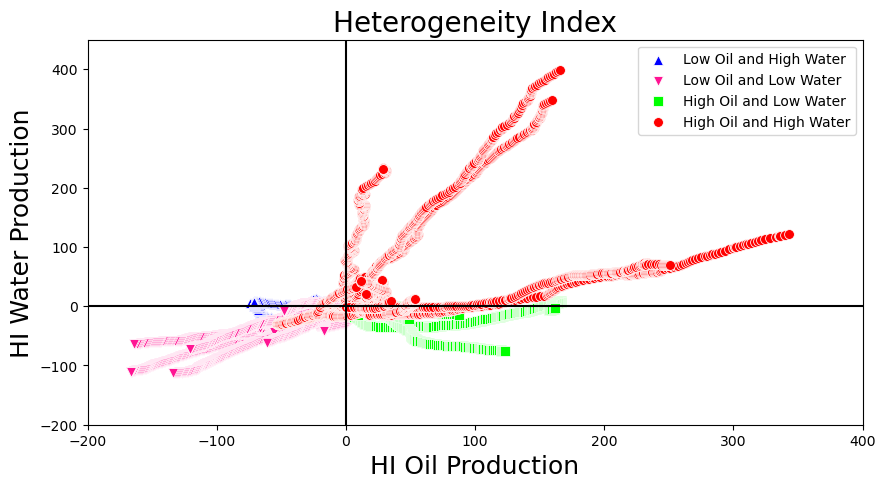

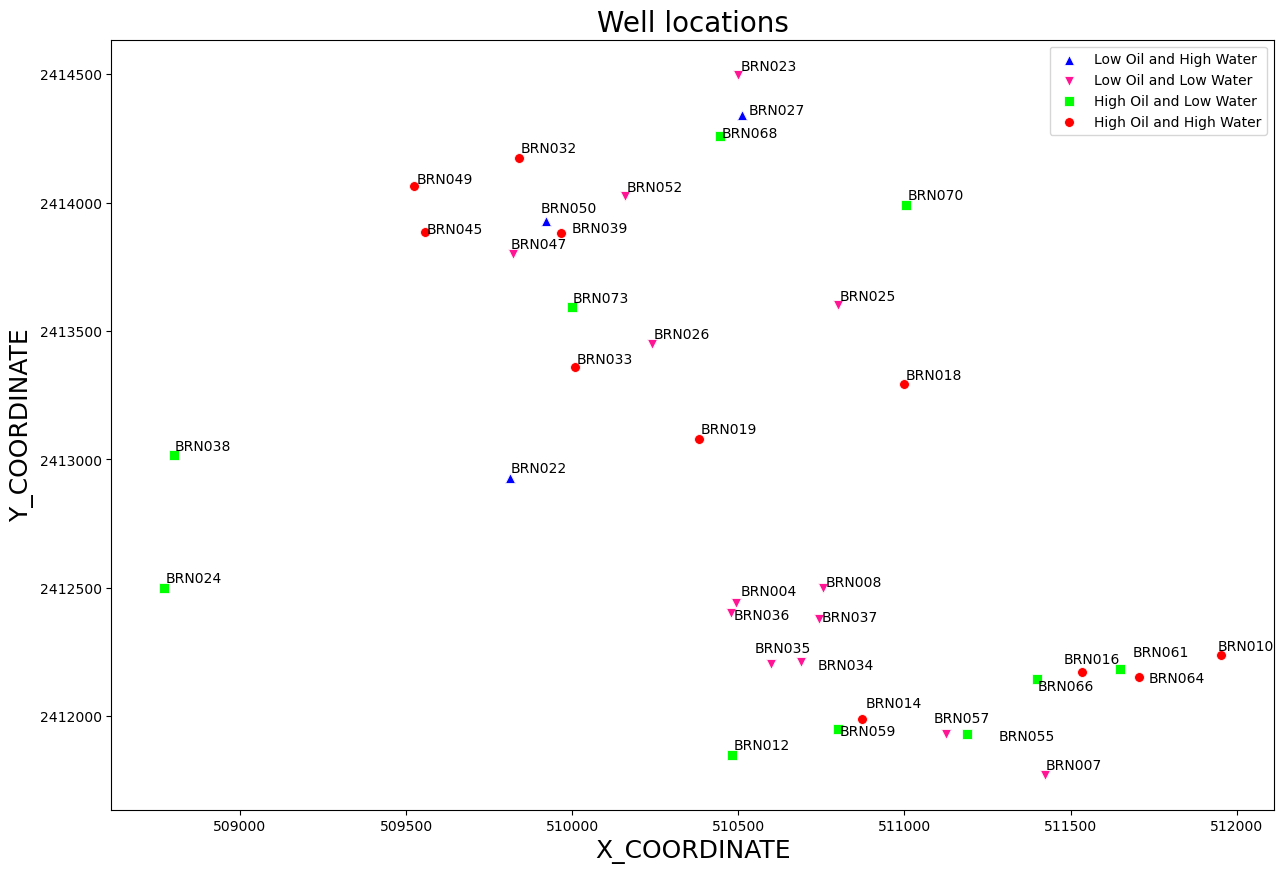

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import pandas as pd

plt.figure(figsize=(10, 5))
plt.xlim(-200, 400)
plt.ylim(-200, 450)
plt.axvline(0, color='black')
plt.axhline(0, color='black')

sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_water', data=df1[df1['class11']=='Low Oil and High Water'], 
                label='Low Oil and High Water', color=hue_dict['Low Oil and High Water'], s=50, marker='^')
sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_water', data=df1[df1['class11']=='Low Oil and Low Water'], 
                label='Low Oil and Low Water', color=hue_dict['Low Oil and Low Water'], s=50, marker='v')
sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_water', data=df1[df1['class11']=='High Oil and Low Water'], 
                label='High Oil and Low Water', color=hue_dict['High Oil and Low Water'], s=50, marker='s')
sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_water', data=df1[df1['class11']=='High Oil and High Water'], 
                label='High Oil and High Water', color=hue_dict['High Oil and High Water'], s=50, marker='o')

plt.xlabel('HI Oil Production', fontsize=18)
plt.ylabel('HI Water Production', fontsize=18)
plt.title('Heterogeneity Index', fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, fontsize=10)

plt.savefig('hetro_index_cum_water_oil.jpg')
plt.show()

plt.figure(figsize=(15, 10))

sns.scatterplot(x='X', y='Y', data=df1[df1['class11']=='Low Oil and High Water'], 
                label='Low Oil and High Water', color=hue_dict['Low Oil and High Water'], s=50, marker='^')
sns.scatterplot(x='X', y='Y', data=df1[df1['class11']=='Low Oil and Low Water'], 
                label='Low Oil and Low Water', color=hue_dict['Low Oil and Low Water'], s=50, marker='v')
sns.scatterplot(x='X', y='Y', data=df1[df1['class11']=='High Oil and Low Water'], 
                label='High Oil and Low Water', color=hue_dict['High Oil and Low Water'], s=50, marker='s')
sns.scatterplot(x='X', y='Y', data=df1[df1['class11']=='High Oil and High Water'], 
                label='High Oil and High Water', color=hue_dict['High Oil and High Water'], s=50, marker='o')

plt.xlabel('X_COORDINATE', fontsize=18)
plt.ylabel('Y_COORDINATE', fontsize=18)
plt.title('Well locations', fontsize=20)

texts = []
for i, point in well_loc.iterrows():
    texts.append(plt.text(point['X'], point['Y'], point['WELL']))

from adjustText import adjust_text
adjust_text(texts)

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles, labels, fontsize=10, loc='upper right')
 


plt.ticklabel_format(style='plain', useOffset=False)
 
plt.show()


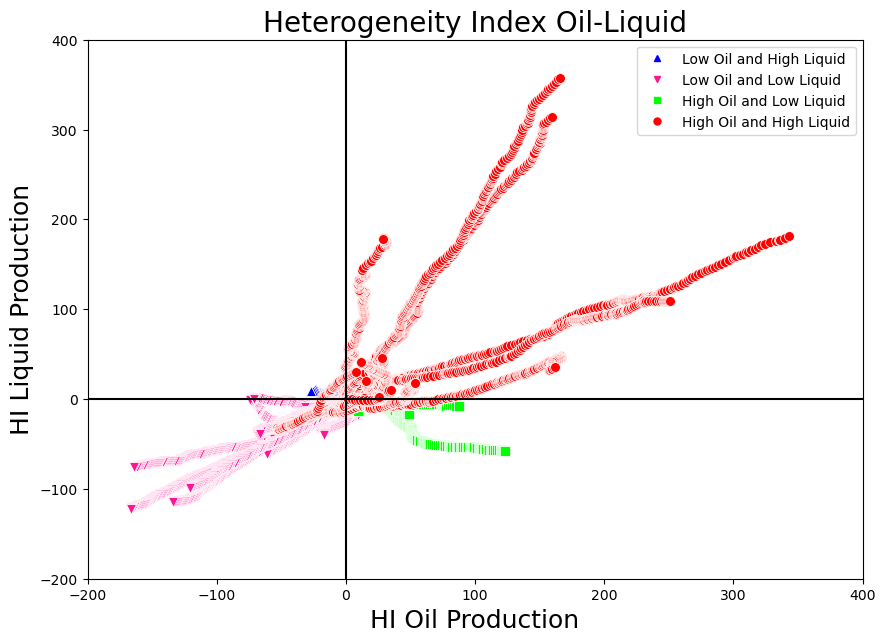

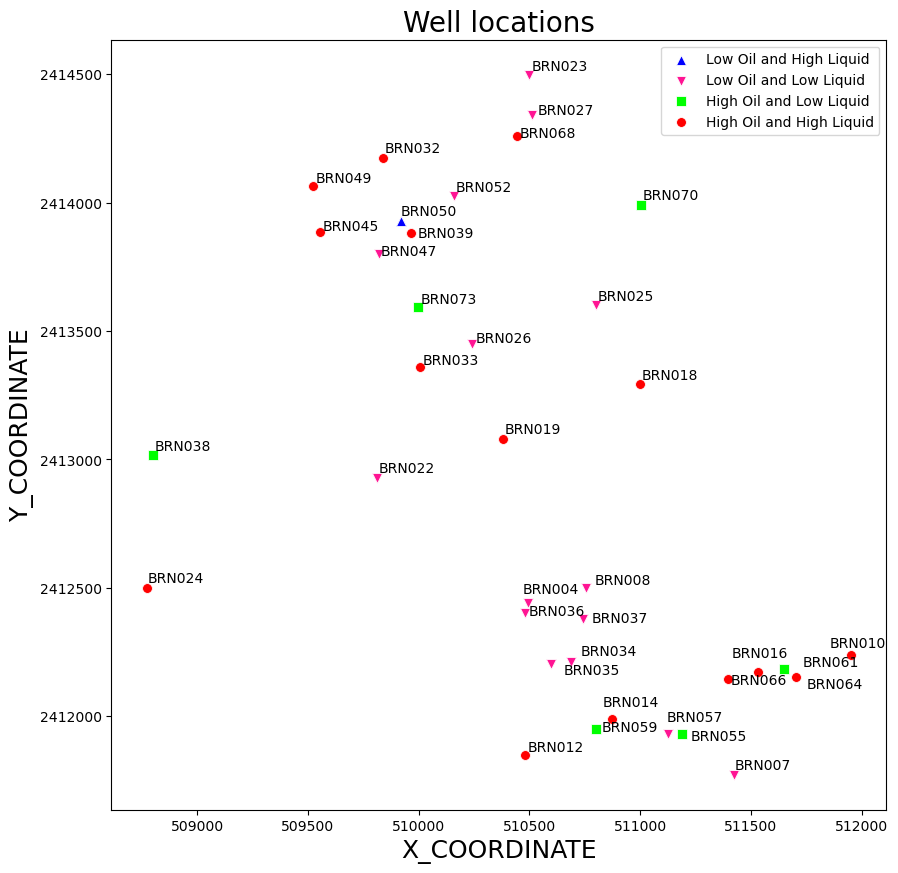

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter
import matplotlib.lines as mlines

# Assuming df1 and well_loc are your DataFrames and hue_dict2 is your palette dictionary

# First plot: HI for oil vs. liquid
plt.figure(figsize=(10, 7))
plt.xlim(-200, 400)
plt.ylim(-200, 400)
plt.axvline(0, color='black')
plt.axhline(0, color='black')

# Plotting each class separately with specific markers
sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_liquid', data=df1[df1['class12']=='Low Oil and High Liquid'], 
                label='Low Oil and High Liquid', color=hue_dict2['Low Oil and High Liquid'], s=50, marker='^')
sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_liquid', data=df1[df1['class12']=='Low Oil and Low Liquid'], 
                label='Low Oil and Low Liquid', color=hue_dict2['Low Oil and Low Liquid'], s=50, marker='v')
sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_liquid', data=df1[df1['class12']=='High Oil and Low Liquid'], 
                label='High Oil and Low Liquid', color=hue_dict2['High Oil and Low Liquid'], s=50, marker='s')
sns.scatterplot(x='cum11_hi_oil', y='cum11_hi_liquid', data=df1[df1['class12']=='High Oil and High Liquid'], 
                label='High Oil and High Liquid', color=hue_dict2['High Oil and High Liquid'], s=50, marker='o')

plt.xlabel('HI Oil Production', fontsize=18)
plt.ylabel('HI Liquid Production', fontsize=18)
plt.title('Heterogeneity Index Oil-Liquid', fontsize=20)

# Custom legend handles
legend_handles = [
    mlines.Line2D([], [], color=hue_dict2['Low Oil and High Liquid'], marker='^', linestyle='None', markersize=5, label='Low Oil and High Liquid'),
    mlines.Line2D([], [], color=hue_dict2['Low Oil and Low Liquid'], marker='v', linestyle='None', markersize=5, label='Low Oil and Low Liquid'),
    mlines.Line2D([], [], color=hue_dict2['High Oil and Low Liquid'], marker='s', linestyle='None', markersize=5, label='High Oil and Low Liquid'),
    mlines.Line2D([], [], color=hue_dict2['High Oil and High Liquid'], marker='o', linestyle='None', markersize=5, label='High Oil and High Liquid')
]
plt.legend(handles=legend_handles, fontsize=10)

plt.show()

# Second plot: Well locations
plt.figure(figsize=(10, 10))

# Plotting each class separately with specific markers
sns.scatterplot(x='X', y='Y', data=df1[df1['class12']=='Low Oil and High Liquid'], 
                label='Low Oil and High Liquid', color=hue_dict2['Low Oil and High Liquid'], s=50, marker='^')
sns.scatterplot(x='X', y='Y', data=df1[df1['class12']=='Low Oil and Low Liquid'], 
                label='Low Oil and Low Liquid', color=hue_dict2['Low Oil and Low Liquid'], s=50, marker='v')
sns.scatterplot(x='X', y='Y', data=df1[df1['class12']=='High Oil and Low Liquid'], 
                label='High Oil and Low Liquid', color=hue_dict2['High Oil and Low Liquid'], s=50, marker='s')
sns.scatterplot(x='X', y='Y', data=df1[df1['class12']=='High Oil and High Liquid'], 
                label='High Oil and High Liquid', color=hue_dict2['High Oil and High Liquid'], s=50, marker='o')

# Adding well names
texts = []
for i, point in well_loc.iterrows():
    texts.append(plt.text(point['X'], point['Y'], point['WELL']))

# Adjusting text for better visualization
adjust_text(texts)

plt.xlabel('X_COORDINATE', fontsize=18)
plt.ylabel('Y_COORDINATE', fontsize=18)
plt.title('Well locations', fontsize=20)

# Custom legend handles
legend_handles = [
    mlines.Line2D([], [], color=hue_dict2['Low Oil and High Liquid'], marker='^', linestyle='None', markersize=5, label='Low Oil and High Liquid'),
    mlines.Line2D([], [], color=hue_dict2['Low Oil and Low Liquid'], marker='v', linestyle='None', markersize=5, label='Low Oil and Low Liquid'),
    mlines.Line2D([], [], color=hue_dict2['High Oil and Low Liquid'], marker='s', linestyle='None', markersize=5, label='High Oil and Low Liquid'),
    mlines.Line2D([], [], color=hue_dict2['High Oil and High Liquid'], marker='o', linestyle='None', markersize=5, label='High Oil and High Liquid')
]
handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles, labels, fontsize=10, loc='upper right')
 


plt.ticklabel_format(style='plain', useOffset=False)
 
plt.show()

In [ ]:
print(df1['cum11_hi_oil'].min(),df1['cum11_hi_oil'].max())
print(df1['cum11_hi_water'].min(),df1['cum11_hi_water'].max())
print(df1['cum11_hi_liquid'].min(),df1['cum11_hi_liquid'].max())

In [ ]:
items = [widgets.Button(description=w) for w in df['sand'].unique()]
display(widgets.HBox([items[0],items[1]]))

fmt='%Y-%m-%d'
date_range = pd.date_range(start=df[df['sand']=='CHANNEL']['date'].min(),end=df[df['sand']=='CHANNEL']['date'].max(),freq='MS')
options = [(item.strftime(fmt),item) for item in date_range]

slider = widgets.SelectionSlider(
    description='Date',
    options=options,
    continuous_update=False
) 

hue_dict = {
    'High Oil and Low Water': 'g',
    'Low Oil and High Water': 'brown',
    'High Oil and High Water': 'b',
    'Low Oil and Low Water': 'r'
}

def update(sand,date):
    plt.figure(figsize=(10,10))
    plt.xlim(-30,70)
    plt.ylim(-30,130)
    plt.axvline(0,color='black')
    plt.axhline(0,color='black')
    sns.scatterplot('cum_hi_oil','cum_hi_water',data=df[(df['sand']==sand)&(df['date']==date)],
                    hue='class', palette=hue_dict,s=50)
    plt.legend(loc=1)


def scatter(b):
    clear_output(wait=True)
    display(widgets.HBox([items[0],items[1]]))
    interactive_plot = interactive(update,date=slider,sand=fixed(b.description))
    display(interactive_plot)

    
items[0].on_click(scatter)
items[1].on_click(scatter)
